In [ ]:
import keras
from keras import layers
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/mnemoraorg/wisconsin-breast-cancer-diagnostic/raw_breast_cancer.csv")

training_features = [df["radius_mean"],
                     df["texture_mean"],
                     df["perimeter_mean"],
                     df["area_mean"],
                     df["smoothness_mean"],
                     df["compactness_mean"],
                     df["concavity_mean"],
                     df["concave points_mean"],
                     df["symmetry_mean"],
                     df["fractal_dimension_mean"]]

training_features = pd.concat(objs=training_features, axis=1)

y = df["diagnosis"]

text_vectorization_layer = layers.TextVectorization()

text_vectorization_layer.adapt(y.values)

y = text_vectorization_layer(y)

In [ ]:
training_features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
y

<tf.Tensor: shape=(569, 1), dtype=int64, numpy=
array([[3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [2],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3],
       [3],
    

In [ ]:
model = keras.Sequential()

layer_one = layers.Dense(units=len(y), activation=keras.activations.sigmoid)
layer_two = layers.Dense(units=512, activation=keras.activations.relu)
layer_three = layers.Dense(units=256, activation=keras.activations.log_softmax)
layer_four = layers.Dense(units=128, activation=keras.activations.hard_tanh)
layer_five = layers.Dense(units=64, activation=keras.activations.hard_silu)
layer_six = layers.Dense(units=32, activation=keras.activations.relu)
layer_seven = layers.Dense(units=16, activation=keras.activations.gelu)
layer_eight = layers.Dense(units=8, activation=keras.activations.log_sigmoid)
layer_nine = layers.Dense(units=4, activation=keras.activations.soft_shrink)
layer_ten = layers.Dense(units=2, activation=keras.activations.sparse_sigmoid)
layer_eleven = layers.Dense(units=1, activation=keras.activations.sigmoid)

model.add(layer_one)
model.add(layer_two)
model.add(layer_three)
model.add(layer_four)
model.add(layer_five)
model.add(layer_six)
model.add(layer_seven)
model.add(layer_eight)
model.add(layer_nine)
model.add(layer_ten)
model.add(layer_eleven)

model(training_features)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (569, 569)             │         6,259 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (569, 512)             │       291,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (569, 256)             │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (569, 128)             │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (569, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (569, 32)              │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (569, 16)              │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (569, 8)               │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (569, 4)               │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (569, 2)               │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (569, 1)               │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 473,372 (1.81 MB)

 Trainable params: 473,372 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_absolute_error])

In [ ]:
model.fit(x=training_features, y=y, epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1630 - mean_absolute_error: 1.3877
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0931 - mean_absolute_error: 1.3644
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0367 - mean_absolute_error: 1.3456
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0916 - mean_absolute_error: 1.3639
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0990 - mean_absolute_error: 1.3663
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0878 - mean_absolute_error: 1.3626
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0424 - mean_absolute_error: 1.3475
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1299 - mean_absolute_error: 1.3766
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1343 - mean_absolute_error: 1.3781
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.1074 - mean_absolute_error: 1.3691


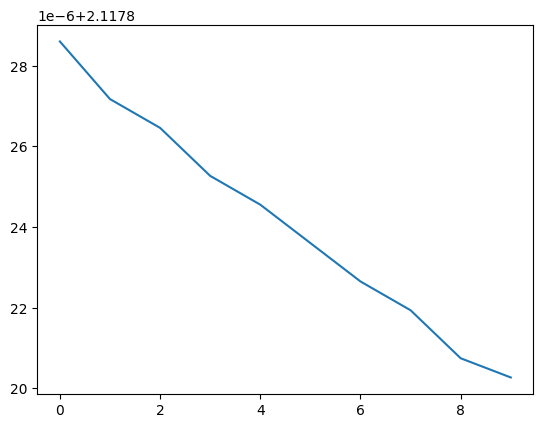

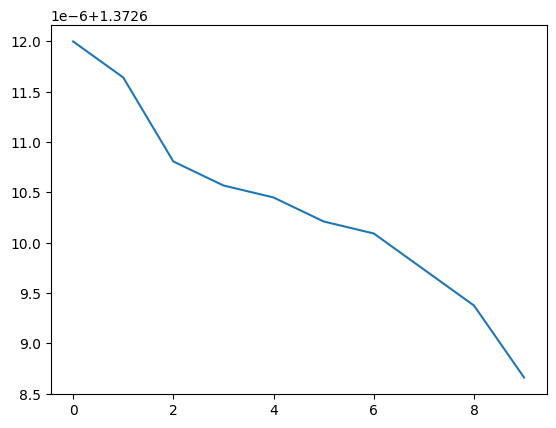

In [ ]:
import matplotlib.pyplot as plt

hist = model.history.history

plt.plot(hist['loss'])
plt.xlabel = "Epoch"
plt.ylabel = "MSE Loss"
plt.show()

plt.plot(hist['mean_absolute_error'])
plt.xlabel = "Epoch"
plt.ylabel = "MAE Accuracy"
plt.show()

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.1098 - mean_absolute_error: 1.3699
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1950 - mean_absolute_error: 1.3984
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0210 - mean_absolute_error: 1.3403
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1872 - mean_absolute_error: 1.3957
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0392 - mean_absolute_error: 1.3464
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1344 - mean_absolute_error: 1.3781
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1630 - mean_absolute_error: 1.3877
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0750 - mean_absolute_error: 1.3583
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1261 - mean_absolute_error: 1.3754
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1166 - mean_absolute_error: 1.3722
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 

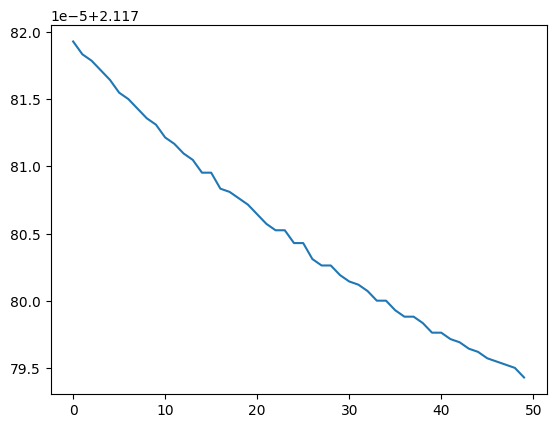

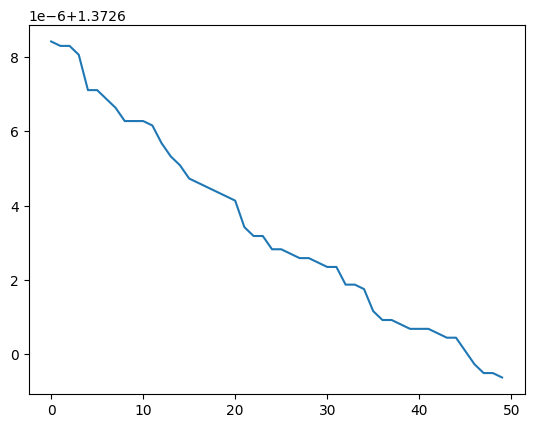

In [ ]:
model.fit(x=training_features, y=y, epochs=50)
hist = model.history.history

plt.plot(hist['loss'])
plt.xlabel = "Epoch"
plt.ylabel = "MSE Loss"
plt.show()

plt.plot(hist['mean_absolute_error'])
plt.xlabel = "Epoch"
plt.ylabel = "MAE Accuracy"
plt.show()

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0807 - mean_absolute_error: 1.3602
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2012 - mean_absolute_error: 1.4004
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1656 - mean_absolute_error: 1.3885
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0542 - mean_absolute_error: 1.3514
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0837 - mean_absolute_error: 1.3612
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2092 - mean_absolute_error: 1.4031
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1566 - mean_absolute_error: 1.3855
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0894 - mean_absolute_error: 1.3631
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1149 - mean_absolute_error: 1.3716
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1554 - mean_absolute_error: 1.3851
Epoch 11/100
18/18 ━━━━━━━━━━

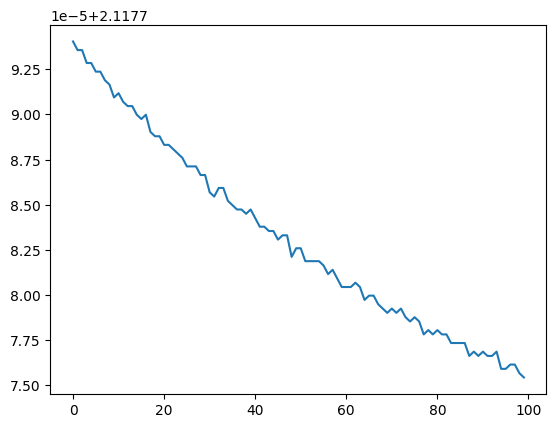

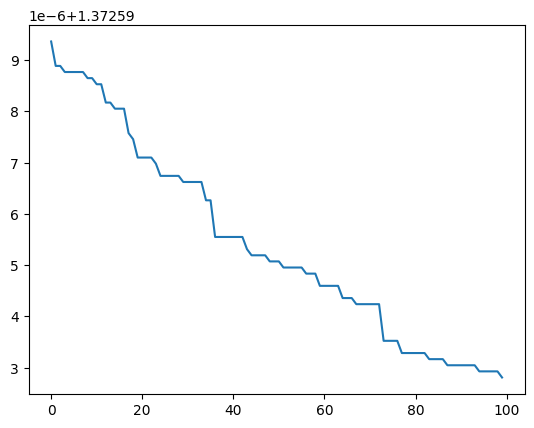

In [ ]:
model.fit(x=training_features, y=y, epochs=100)
hist = model.history.history

plt.plot(hist['loss'])
plt.xlabel = "Epoch"
plt.ylabel = "MSE Loss"
plt.show()

plt.plot(hist['mean_absolute_error'])
plt.xlabel = "Epoch"
plt.ylabel = "MAE Accuracy"
plt.show()